In [3]:
import numpy as np
import pandas as pd
import os
from features import get_feature, read_data

In [4]:
scores_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
scores_df.head(3)

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id,ori_annotation
0,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,ERBB2,1.0,2004.0,2007.0,0.917,0.298,0.957,P04626,9606.ENSP00000269571,True
1,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,PIK3CA,1.0,2004.0,2023.0,0.978,0.275,0.957,P42336,9606.ENSP00000263967,True
2,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,TP53,1.0,2011.0,2023.0,0.911,0.256,0.957,P04637,9606.ENSP00000269305,True


In [5]:
sampled_ids = scores_df['string_id'].tolist()[:10]

In [6]:
sampled_ids

['9606.ENSP00000269571',
 '9606.ENSP00000263967',
 '9606.ENSP00000269305',
 '9606.ENSP00000410294',
 '9606.ENSP00000256078',
 '9606.ENSP00000257430',
 '9606.ENSP00000261769',
 '9606.ENSP00000500891',
 '9606.ENSP00000245414',
 '9606.ENSP00000361021']

In [7]:
disease = 'ICD10_C16'
sub_df = scores_df[scores_df['disease_id'] == disease]

# Filter only rows where string_id is in sampled_ids
filtered = sub_df[sub_df['string_id'].isin(sampled_ids)]

# Reindex to match the order of sampled_ids
filtered = filtered.set_index('string_id').loc[sampled_ids]

# Get the score column as probabilities
probabilities = filtered['score'].values


In [8]:
probabilities

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 0.95, 0.9 ])

In [1]:
import numpy as np

# 1. Generate example data
samples = np.array([f"sample_{i}" for i in range(100)])
weights = np.random.rand(100)  # random weights in [0, 1]

# Normalize weights to sum to 1 (probabilities)
probabilities = weights / weights.sum()

# 2. Perform weighted bootstrap sampling
n_iterations = 5   # how many sample lists you want
n_samples = 100    # how many items per bootstrap sample

bootstrap_samples = []

for _ in range(n_iterations):
    resample = np.random.choice(samples, size=n_samples, replace=True, p=probabilities)
    bootstrap_samples.append(resample)

# 3. Display results
for i, b in enumerate(bootstrap_samples):
    print(f"Bootstrap Sample {i+1}:\n", b[:10], "...")  # show only first 10 for brevity


Bootstrap Sample 1:
 ['sample_66' 'sample_19' 'sample_92' 'sample_83' 'sample_9' 'sample_85'
 'sample_83' 'sample_4' 'sample_54' 'sample_27'] ...
Bootstrap Sample 2:
 ['sample_26' 'sample_24' 'sample_98' 'sample_7' 'sample_10' 'sample_29'
 'sample_74' 'sample_68' 'sample_14' 'sample_88'] ...
Bootstrap Sample 3:
 ['sample_29' 'sample_53' 'sample_87' 'sample_81' 'sample_6' 'sample_60'
 'sample_39' 'sample_62' 'sample_39' 'sample_52'] ...
Bootstrap Sample 4:
 ['sample_54' 'sample_24' 'sample_59' 'sample_79' 'sample_40' 'sample_13'
 'sample_39' 'sample_48' 'sample_84' 'sample_98'] ...
Bootstrap Sample 5:
 ['sample_1' 'sample_98' 'sample_63' 'sample_71' 'sample_41' 'sample_54'
 'sample_89' 'sample_26' 'sample_0' 'sample_26'] ...


In [2]:
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
feature = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/prose/data/prose_emb_full.csv')

In [6]:
a[0],b[0]

('9606.ENSP00000269571', '9606.ENSP00000000233.5')

In [9]:
feature['string_id'] = feature['string_id'].apply(lambda x: '.'.join(x.split('.')[:-1]))

In [10]:
len(feature['string_id'].unique())

19011

In [12]:
a = all_df['string_id'].tolist()
b = feature['string_id'].tolist()
len(set(a)&set(b))

3749

In [13]:
feature.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/prose/data/prose_emb_full.csv',index=False)

In [5]:
time = 2016
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
selected_diseases = []
for disease_id in all_df['disease_id'].unique():
    sub_df = all_df[all_df['disease_id']==disease_id]
    if len(sub_df) < 15:
        continue
    else:
        # print(type(time),type(sub_df['first_pub_year'].max()))
        if sub_df['first_pub_year'].max() > time and sub_df['first_pub_year'].min() <= time and len(sub_df[sub_df['first_pub_year']<time]) >=5:
            selected_diseases.append(disease_id)
            print(disease_id,len(sub_df[sub_df['first_pub_year']>time]))

ICD10_C16 29
ICD10_C18 11
ICD10_C43 3
ICD10_C45 1
ICD10_C50 140
ICD10_C56 1
ICD10_C67 29
ICD10_C81 4
ICD10_C92 1
ICD10_D46 1
ICD10_D57 2
ICD10_D81 3
ICD10_D83 3
ICD10_E10 2
ICD10_E11 42
ICD10_E66 33
ICD10_E84 9
ICD10_F01 33
ICD10_F20 17
ICD10_F31 23
ICD10_F72 15
ICD10_F90 14
ICD10_G10 3
ICD10_G20 13
ICD10_G24 9
ICD10_G30 19
ICD10_G35 20
ICD10_G40 35
ICD10_G43 6
ICD10_G91 7
ICD10_H40 1
ICD10_I10 17
ICD10_I25 33
ICD10_I26 1
ICD10_I42 21
ICD10_I46 1
ICD10_I50 42
ICD10_I63 2
ICD10_I70 8
ICD10_I95 1
ICD10_J45 9
ICD10_J62 3
ICD10_J80 1
ICD10_K44 8
ICD10_K51 10
ICD10_L20 4
ICD10_L23 1
ICD10_L40 3
ICD10_L80 5
ICD10_M32 8
ICD10_M34 2
ICD10_M41 5
ICD10_N04 41
ICD10_N17 24
ICD10_N18 4
ICD10_N46 14
ICD10_N80 7
ICD10_N97 3
ICD10_C23 1
ICD10_C53 4


In [10]:
time = 2016
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
selected_diseases = []
for disease_id in all_df['disease_id'].unique():
    sub_df = all_df[all_df['disease_id']==disease_id]
    if len(sub_df) < 15:
        continue
    else:
        # print(type(time),type(sub_df['first_pub_year'].max()))
        if sub_df['first_pub_year'].max() > time and sub_df['first_pub_year'].min() <= time and len(sub_df[sub_df['first_pub_year']<time]) >=5:
            selected_diseases.append(disease_id)
            print(disease_id,len(sub_df[sub_df['first_pub_year']<time]))

ICD10_C16 63
ICD10_C18 37
ICD10_C43 11
ICD10_C45 42
ICD10_C50 429
ICD10_C56 121
ICD10_C67 166
ICD10_C81 19
ICD10_C92 28
ICD10_D46 7
ICD10_D57 19
ICD10_D81 11
ICD10_D83 22
ICD10_E10 110
ICD10_E11 245
ICD10_E66 230
ICD10_E84 38
ICD10_F01 7
ICD10_F20 887
ICD10_F31 445
ICD10_F72 17
ICD10_F90 10
ICD10_G10 32
ICD10_G20 128
ICD10_G24 20
ICD10_G30 177
ICD10_G35 98
ICD10_G40 91
ICD10_G43 21
ICD10_G91 14
ICD10_H40 21
ICD10_I10 19
ICD10_I25 105
ICD10_I26 15
ICD10_I42 143
ICD10_I46 19
ICD10_I50 99
ICD10_I63 36
ICD10_I70 61
ICD10_I95 54
ICD10_J45 193
ICD10_J62 11
ICD10_J80 50
ICD10_K44 53
ICD10_K51 65
ICD10_L20 56
ICD10_L23 70
ICD10_L40 76
ICD10_L80 33
ICD10_M32 92
ICD10_M34 31
ICD10_M41 26
ICD10_N04 34
ICD10_N17 67
ICD10_N18 87
ICD10_N46 76
ICD10_N80 156
ICD10_N97 28
ICD10_C23 16
ICD10_C53 11


In [4]:
for disease in all_df['disease_id'].unique():
    subdf = all_df[all_df['disease_id']==disease]
    print(len(subdf))

94
49
51
43
579
26
124
561
196
23
21
29
17
21
15
27
21
112
288
277
47
40
908
468
14
14
33
25
36
145
30
198
119
128
65
27
23
22
36
144
16
168
20
160
28
39
69
55
204
16
51
18
64
75
61
71
79
16
38
18
108
39
32
25
77
94
94
91
163
32
18
15


In [38]:
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
selected_diseases = (
    all_df.groupby('disease_id')
    .filter(lambda x: (len(x) > 15))
    ['disease_id']
    .unique()
    .tolist())
path_list = [
'data/ppi_full_emb.csv',
'data/bioconcept/bioconcept_full.csv',
'data/biograd/biograd_full_emb.csv',
'data/esmfold/esm2.csv',
'data/pre_processed_features/seq_emb/human_uniport_seqemb.csv',
'data/pre_processed_features/expression_emb/exp_emb.csv']  

time_cut = [2016,2019,2025,2016,2016,2017]
# path_list = ['data/pre_processed_features/T5/T5_align.csv']
ids = []
for i, path in enumerate(path_list):
    df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/'+path)
    print(path,time_cut[i])
    for disease in selected_diseases:
        subdf = all_df[all_df['disease_id']==disease]
        subdf = subdf[subdf['string_id'].isin(df['string_id'])]
        print(len(subdf[subdf['first_pub_year']<=time_cut[i]]),len(subdf[subdf['first_pub_year']>time_cut[i]]))

data/ppi_full_emb.csv 2016
65 29
38 11
48 3
42 1
439 140
26 0
123 1
561 0
167 29
19 4
21 0
28 1
16 1
19 2
24 3
21 0
110 2
246 42
244 33
38 9
7 33
891 17
445 23
18 15
11 14
33 3
132 13
21 9
179 19
99 20
93 35
65 0
21 6
16 7
21 1
19 17
111 33
15 1
147 21
19 1
118 42
28 0
37 2
61 8
54 1
195 9
13 3
50 1
18 0
56 8
65 10
57 4
70 1
76 3
16 0
33 5
0 18
100 8
37 2
27 5
25 0
36 41
70 24
90 4
77 14
156 7
29 3
17 1
data/bioconcept/bioconcept_full.csv 2019
59 23
36 8
41 1
36 0
481 59
24 0
110 1
494 0
160 16
14 4
19 0
26 0
17 0
20 1
22 2
20 0
97 0
248 7
257 5
44 1
7 31
834 8
429 1
19 9
17 5
31 2
130 2
22 6
173 8
105 0
122 1
56 0
20 5
20 2
20 0
17 14
106 23
14 1
146 9
17 1
123 23
23 0
34 2
60 3
50 0
181 1
12 3
48 1
16 0
56 3
57 8
53 1
64 0
65 2
15 0
32 1
18 0
93 2
33 1
26 1
23 0
67 4
83 5
85 2
79 8
144 1
30 2
16 1
data/biograd/biograd_full_emb.csv 2025
94 0
49 0
51 0
43 0
575 0
26 0
123 0
549 0
195 0
23 0
21 0
29 0
17 0
21 0
27 0
20 0
111 0
285 0
277 0
46 0
40 0
896 0
460 0
32 0
25 0
36 0
143 0
29 0


In [43]:
all_df[all_df['disease_id']=='ICD10_F20']['string_id'].unique().shape

(908,)

In [ ]:
# 
path_list = [
'data/ppi_full_emb.csv',
'data/bioconcept/bioconcept_full.csv',
'data/biograd/biograd_full_emb.csv',
'data/esmfold/esm2.csv',
'data/pre_processed_features/seq_emb/human_uniport_seqemb.csv',
'data/pre_processed_features/expression_emb/exp_emb.csv']  


# path_list = ['data/pre_processed_features/T5/T5_align.csv']
ids = []
for path in path_list:
    df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/'+path)
    columns = [col for col in df.columns if not col.startswith('feature')]
    print(columns)
    # ids.append(df['string_id'].tolist())
    # print(len(df['string_id'].tolist()))
    df_new = df.drop_duplicates(subset='string_id')
    print(len(df),len(df_new))
    # df_new.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/'+path,index=False)
    # new_df = df[df['string_id'].isin(bioconcept['string_id'])]
    # print(len(new_df))
    # new_df = new_df.drop_duplicates(subset='string_id')
    # print(len(new_df))
    # new_df.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/'+path.split('.csv')[0]+'_aligned.csv',index = False)

['string_id']
19622 19622
['string_id']
16265 16265
['string_id']
17869 17869
['string_id']
19174 19174
['string_id']
18847 18847
['string_id']
17481 17481


In [ ]:
# 'data/ppi_full_emb_aligned.csv',
path_list = [
'data/pre_processed_features/T5/T5_align.csv',
'data/pre_processed_features/GENE2VEC/GENE2VEC_align.csv',
'data/pre_processed_features/expression_emb/SCGPT-HUMAN/scgpt.csv',
'data/pre_processed_features/txt/BIOCONCEPTVEC-FASTTEXT/text.csv',
'data/pre_processed_features/ESM2/ESM2_align.csv',
'data/pre_processed_features/MASHUP/MASHUP_align.csv',
'data/pre_processed_features/GENEPT_MODEL3/GENEPT_MODEL3_align.csv',
'data/pre_processed_features/GF_12L95M/GF_12L95M_align.csv']  


# path_list = ['data/pre_processed_features/T5/T5_align.csv']
ids = []
for path in path_list:
    df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/'+path)
    columns = [col for col in df.columns if not col.startswith('feature')]
    print(columns)
    # ids.append(df['string_id'].tolist())
    # print(len(df['string_id'].tolist()))
    df_new = df.drop_duplicates(subset='string_id')
    print(len(df),len(df_new))
    # df_new.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/'+path,index=False)
    # new_df = df[df['string_id'].isin(bioconcept['string_id'])]
    # print(len(new_df))
    # new_df = new_df.drop_duplicates(subset='string_id')
    # print(len(new_df))
    # new_df.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/'+path.split('.csv')[0]+'_aligned.csv',index = False)

['string_id']
11332 11332
['string_id']
11332 11332
['string_id']
11332 11332
['string_id']
18847 18847
['string_id']
17481 17481


In [66]:
# Finding intersection using set
intersection = set(ids[0])  # Start with the first list
for lst in ids[1:]:
    intersection.intersection_update(lst)  # Update the intersection with each subsequent list

# Convert the result back to a list if needed
result = list(intersection)
len(result)

11332

In [9]:
ppi_align = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/ppi_full_emb_aligned.csv')
ppi_align.head(3)

,string_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,9606.ENSP00000000233,0.155726,-0.354209,-0.119713,0.077604,-0.088752,-0.084138,-0.194337,0.245641,-0.013034,...,0.041288,0.094826,0.219137,-0.580060,-0.044324,0.104809,0.021702,0.040533,0.401031,-0.251952
1,9606.ENSP00000356607,-0.025839,-0.114901,0.265679,-0.251836,-0.078812,0.178152,0.069153,-0.101698,0.328611,...,0.034928,-0.167052,-0.228639,-0.133275,-0.171431,0.096778,0.048151,0.002256,0.045572,-0.426953
2,9606.ENSP00000427567,0.297166,-0.260430,-0.211906,-0.512067,0.040383,-0.011766,-0.216154,-0.057087,-0.062172,...,-0.252881,-0.150249,-0.291801,-0.021340,-0.071092,-0.009001,0.056502,0.169398,0.254360,-0.325764


In [22]:
ppi_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/ppi_full_emb.csv')

In [7]:
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
all_df = all_df[all_df['string_id'].isin(ppi_align['string_id'])]

selected_diseases = (
        all_df.groupby('disease_id')
        .filter(lambda x: (len(x) > 15)))

In [38]:
len(selected_diseases_filtered.groupby('disease_id').filter(lambda x: (len(x) > 15))['disease_id'].unique())

57

In [33]:
selected_diseases_filtered = selected_diseases[selected_diseases['string_id'].isin(ppi_align['string_id'])]
selected_diseases_filtered

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id,ori_annotation
0,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,ERBB2,1.00,2004.0,2007.0,0.917,0.298,0.957,P04626,9606.ENSP00000269571,True
1,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,PIK3CA,1.00,2004.0,2023.0,0.978,0.275,0.957,P42336,9606.ENSP00000263967,True
2,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,TP53,1.00,2011.0,2023.0,0.911,0.256,0.957,P04637,9606.ENSP00000269305,True
3,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,FGFR2,1.00,1999.0,2001.0,0.937,0.341,0.913,P21802,9606.ENSP00000410294,True
4,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,KRAS,1.00,1987.0,2012.0,0.881,0.283,0.913,P01116,9606.ENSP00000256078,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,IL1B,0.85,2003.0,NaN,0.826,0.265,0.957,P01584,9606.ENSP00000263341,False
7144,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,TNFRSF1B,0.65,2005.0,NaN,0.857,0.396,0.913,P20333,9606.ENSP00000365435,False
7145,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,PTPN22,0.65,2008.0,NaN,0.833,0.435,0.957,Q9Y2R2,9606.ENSP00000352833,False
7147,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,FAM163A,0.40,2022.0,NaN,0.000,0.831,0.217,Q96GL9,9606.ENSP00000354891,False


In [35]:
selected_diseases_filtered.to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/align_disgent_with_time.csv')

In [34]:
selected_diseases

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id,ori_annotation
0,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,ERBB2,1.00,2004.0,2007.0,0.917,0.298,0.957,P04626,9606.ENSP00000269571,True
1,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,PIK3CA,1.00,2004.0,2023.0,0.978,0.275,0.957,P42336,9606.ENSP00000263967,True
2,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,TP53,1.00,2011.0,2023.0,0.911,0.256,0.957,P04637,9606.ENSP00000269305,True
3,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,FGFR2,1.00,1999.0,2001.0,0.937,0.341,0.913,P21802,9606.ENSP00000410294,True
4,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,KRAS,1.00,1987.0,2012.0,0.881,0.283,0.913,P01116,9606.ENSP00000256078,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,PTPN22,0.65,2008.0,NaN,0.833,0.435,0.957,Q9Y2R2,9606.ENSP00000352833,False
7146,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,HLA-DRB1,0.60,2002.0,NaN,0.857,0.375,0.957,P01911,9606.ENSP00000353099,False
7147,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,FAM163A,0.40,2022.0,NaN,0.000,0.831,0.217,Q96GL9,9606.ENSP00000354891,False
7148,ICD10_N97,NaN,HPO_HP:0008222,"Infertility, Female",TUBB8,0.45,2016.0,NaN,0.000,0.793,0.130,Q3ZCM7,9606.ENSP00000456206,False


In [35]:
ppi_align_results = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_full/all_disease.csv')
ppi_results = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_new/all_disease.csv')

In [30]:
ppi_results = ppi_results[ppi_results['method']=='random_negative_bagging']
ppi_align_results = ppi_align_results[ppi_align_results['method']=='random_negative_bagging']

In [36]:
ppi_results

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,pm_0.5%,...,pm_20%,pm_25%,pm_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
0,random_negative_bagging,0.124901,0.403557,0.857708,0.009831,0.011470,0.964032,0.003687,0.003823,0.982304,...,0.823098,0.789502,0.762974,0.941951,0.05860,0.262355,0.481360,0.612183,0.797180,ICD10_E10
1,random_negativeauroc,0.134387,0.394466,0.830830,0.009524,0.011470,0.955336,0.003653,0.003823,0.979800,...,0.823327,0.788308,0.761373,0.940853,0.05968,0.257390,0.465847,0.597861,0.788398,ICD10_E10
2,random_negative_bagging,0.137427,0.533333,0.830409,0.007984,0.009621,0.925731,0.002967,0.003206,0.985572,...,0.813799,0.786818,0.754563,0.925290,0.07518,0.336609,0.571693,0.671205,0.804826,ICD10_C16
3,random_negativeauroc,0.169591,0.491228,0.767251,0.007369,0.009621,0.926316,0.002967,0.003206,0.982406,...,0.818132,0.784350,0.754675,0.920662,0.07978,0.314760,0.532621,0.634322,0.782563,ICD10_C16
4,random_negative_bagging,0.100000,0.307619,0.660952,0.004806,0.007260,0.860952,0.002079,0.002419,0.967872,...,0.805456,0.771181,0.740835,0.866427,0.13386,0.205385,0.393156,0.499856,0.680466,ICD10_L23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,random_negativeauroc,0.201099,0.550549,0.883516,0.006237,0.007055,0.970330,0.002283,0.002351,0.981789,...,0.826940,0.792566,0.763937,0.958613,0.04174,0.345187,0.600144,0.710918,0.850868,ICD10_I70
132,random_negative_bagging,0.380000,0.686667,0.886667,0.002347,0.002653,0.960000,0.000850,0.000884,0.991233,...,0.820149,0.784891,0.760956,0.944559,0.05560,0.557889,0.721106,0.787349,0.872975,ICD10_C54
133,random_negativeauroc,0.420000,0.726667,0.846667,0.002245,0.002653,0.920000,0.000816,0.000884,0.991639,...,0.820149,0.784891,0.752560,0.935135,0.06120,0.548882,0.710955,0.770960,0.855277,ICD10_C54
134,random_negative_bagging,0.132564,0.413205,0.729487,0.014697,0.020144,0.882436,0.005926,0.006713,0.983373,...,0.803183,0.771253,0.746658,0.892603,0.10822,0.281103,0.463633,0.564137,0.722238,ICD10_C67


In [25]:
ppi_results.columns

Index(['method', 'top_recall_25', 'top_recall_300', 'top_recall_10%',
       'top_precision_10%', 'max_precision_10%', 'top_recall_30%',
       'top_precision_30%', 'max_precision_30%', 'auroc', 'rank_ratio',
       'bedroc_1', 'bedroc_5', 'bedroc_10', 'bedroc_30', 'disease'],
      dtype='object')

In [ ]:
overlap = []
for disease in selected_diseases['disease_id'].unique():
    subdf = selected_diseases[selected_diseases['disease_id']==disease]
    overlap.append(len(set(ppi_align['string_id'].tolist()) & set(subdf['string_id'].tolist()))/len(set(ppi_df['string_id'].tolist()) & set(subdf['string_id'].tolist())))
    # print(len(subdf[subdf['score']<0.55])/len(subdf))

NameError: name 'ppi_df' is not defined

In [31]:
compare = pd.DataFrame({
    'disease': selected_diseases['disease_id'].unique()
    # 'overlap': overlap
})
compare = compare.merge(
    ppi_results[['disease', 'auroc', 'bedroc_1', 'bedroc_5', 'bedroc_10', 'bedroc_30']],
    on='disease',
    how='left',
    suffixes=('', '_ppi')
)

compare = compare.merge(
    ppi_align_results[['disease', 'auroc', 'bedroc_1', 'bedroc_5', 'bedroc_10', 'bedroc_30']],
    on='disease',
    how='left',
    suffixes=('', '_ppi_align')
)
compare

,disease,auroc,bedroc_1,bedroc_5,bedroc_10,bedroc_30,auroc_ppi_align,bedroc_1_ppi_align,bedroc_5_ppi_align,bedroc_10_ppi_align,bedroc_30_ppi_align
0,ICD10_C16,0.925290,0.336609,0.571693,0.671205,0.804826,0.914160,0.316717,0.521148,0.620694,0.771343
1,ICD10_C18,0.934992,0.249585,0.470425,0.590419,0.773542,0.905911,0.254112,0.476764,0.586958,0.753082
2,ICD10_C43,0.933227,0.412564,0.605347,0.687349,0.813070,0.908736,0.373704,0.541863,0.636204,0.776827
3,ICD10_C45,0.853224,0.203181,0.391463,0.497302,0.670161,0.872515,0.240045,0.417258,0.510141,0.679956
4,ICD10_C50,0.792186,0.122061,0.214374,0.292323,0.491859,0.767568,0.115267,0.205342,0.283853,0.473966
5,ICD10_C54,0.944559,0.557889,0.721106,0.787349,0.872975,0.949149,0.492434,0.697466,0.782831,0.880536
6,ICD10_C56,0.919645,0.348094,0.546477,0.646828,0.791603,0.929195,0.318358,0.529977,0.632328,0.787685
7,ICD10_C61,0.720549,0.095871,0.146815,0.209787,0.396865,0.665111,0.080437,0.126216,0.179557,0.344941
8,ICD10_C67,0.892603,0.281103,0.463633,0.564137,0.722238,0.876335,0.239401,0.415297,0.517790,0.688975
9,ICD10_C81,0.924129,0.330460,0.591477,0.697263,0.824691,0.921585,0.309290,0.547213,0.652145,0.803421


In [32]:
compare.rename(columns={
    'auroc': 'auroc_ppi',
    'bedroc_1': 'bedroc_1_ppi',
    'bedroc_5': 'bedroc_5_ppi',
    'bedroc_10': 'bedroc_10_ppi',
    'bedroc_30': 'bedroc_30_ppi',
    'auroc_ppi_align': 'auroc_align',
    'bedroc_1_ppi_align': 'bedroc_1_align',
    'bedroc_5_ppi_align': 'bedroc_5_align',
    'bedroc_10_ppi_align': 'bedroc_10_align',
    'bedroc_30_ppi_align': 'bedroc_30_align'
}, inplace=True)

# Desired column order
ordered_columns = [
    # 'disease', 'overlap',
    'disease',
    'auroc_ppi', 'auroc_align',
    'bedroc_1_ppi', 'bedroc_1_align',
    'bedroc_5_ppi', 'bedroc_5_align',
    'bedroc_10_ppi', 'bedroc_10_align',
    'bedroc_30_ppi', 'bedroc_30_align'
]

# Reorder columns
compare = compare[ordered_columns]


In [33]:
compare

,disease,auroc_ppi,auroc_align,bedroc_1_ppi,bedroc_1_align,bedroc_5_ppi,bedroc_5_align,bedroc_10_ppi,bedroc_10_align,bedroc_30_ppi,bedroc_30_align
0,ICD10_C16,0.925290,0.914160,0.336609,0.316717,0.571693,0.521148,0.671205,0.620694,0.804826,0.771343
1,ICD10_C18,0.934992,0.905911,0.249585,0.254112,0.470425,0.476764,0.590419,0.586958,0.773542,0.753082
2,ICD10_C43,0.933227,0.908736,0.412564,0.373704,0.605347,0.541863,0.687349,0.636204,0.813070,0.776827
3,ICD10_C45,0.853224,0.872515,0.203181,0.240045,0.391463,0.417258,0.497302,0.510141,0.670161,0.679956
4,ICD10_C50,0.792186,0.767568,0.122061,0.115267,0.214374,0.205342,0.292323,0.283853,0.491859,0.473966
5,ICD10_C54,0.944559,0.949149,0.557889,0.492434,0.721106,0.697466,0.787349,0.782831,0.872975,0.880536
6,ICD10_C56,0.919645,0.929195,0.348094,0.318358,0.546477,0.529977,0.646828,0.632328,0.791603,0.787685
7,ICD10_C61,0.720549,0.665111,0.095871,0.080437,0.146815,0.126216,0.209787,0.179557,0.396865,0.344941
8,ICD10_C67,0.892603,0.876335,0.281103,0.239401,0.463633,0.415297,0.564137,0.517790,0.722238,0.688975
9,ICD10_C81,0.924129,0.921585,0.330460,0.309290,0.591477,0.547213,0.697263,0.652145,0.824691,0.803421


In [18]:
all_df = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')

In [20]:
len(selected_diseases[selected_diseases['disease_id']=='ICD10_G43']),len(all_df[all_df['disease_id']=='ICD10_G43'])

(16, 27)

In [21]:
len(selected_diseases[selected_diseases['disease_id']=='ICD10_C61']),len(all_df[all_df['disease_id']=='ICD10_C61'])


(381, 561)

In [24]:
(len(ppi_align)-16),(len(ppi_df)-27)

(11316, 19595)

In [25]:
(len(ppi_align)-381),(len(ppi_df)-561)

(10951, 19061)

In [30]:
compare

,disease,overlap,auroc_ppi,auroc_align,bedroc_1_ppi,bedroc_1_align,bedroc_5_ppi,bedroc_5_align,bedroc_10_ppi,bedroc_10_align,bedroc_30_ppi,bedroc_30_align
0,ICD10_C16,0.776596,0.912200,0.560824,0.307701,2.585618e-02,0.541284,0.036050,0.643888,0.062305,0.782678,0.177743
1,ICD10_C18,0.591837,0.932757,0.471676,0.244265,7.742134e-18,0.453562,0.000038,0.580825,0.001928,0.768233,0.059488
2,ICD10_C43,0.784314,0.912877,0.553877,0.387561,2.166751e-02,0.575168,0.062888,0.653783,0.088689,0.781645,0.168505
3,ICD10_C45,0.744186,0.876927,0.447622,0.192384,3.453043e-02,0.375956,0.033613,0.483530,0.034750,0.672429,0.070649
4,ICD10_C50,0.709845,0.669638,0.562428,0.116752,1.992618e-01,0.168195,0.223665,0.225709,0.246750,0.385067,0.335506
...,...,...,...,...,...,...,...,...,...,...,...,...
63,ICD10_N18,0.861702,0.961410,0.506085,0.319451,4.086979e-08,0.576681,0.002300,0.695194,0.014018,0.850500,0.101124
64,ICD10_N46,0.747253,0.855974,0.600564,0.209974,2.874578e-02,0.383549,0.065030,0.479484,0.093183,0.652802,0.200757
65,ICD10_N80,0.748466,0.868058,0.534380,0.132534,4.987335e-03,0.316050,0.007665,0.442682,0.009121,0.657192,0.047948
66,ICD10_N97,0.812500,0.923402,0.538400,0.384762,9.138643e-07,0.609579,0.005906,0.700190,0.030495,0.815311,0.152355


In [54]:
ppi_features = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/ppi_full_emb.csv')
ppi_align_features = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/ppi_full_emb_aligned.csv')


In [55]:
ppi_align_features

,string_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
0,9606.ENSP00000000233,0.155726,-0.354209,-0.119713,0.077604,-0.088752,-0.084138,-0.194337,0.245641,-0.013034,...,0.094826,0.219137,-0.580060,-0.044324,0.104809,0.021702,0.040533,0.401031,-0.251952,0
1,9606.ENSP00000356607,-0.025839,-0.114901,0.265679,-0.251836,-0.078812,0.178152,0.069153,-0.101698,0.328611,...,-0.167052,-0.228639,-0.133275,-0.171431,0.096778,0.048151,0.002256,0.045572,-0.426953,0
2,9606.ENSP00000427567,0.297166,-0.260430,-0.211906,-0.512067,0.040383,-0.011766,-0.216154,-0.057087,-0.062172,...,-0.150249,-0.291801,-0.021340,-0.071092,-0.009001,0.056502,0.169398,0.254360,-0.325764,0
3,9606.ENSP00000253413,-0.209687,-0.183011,0.277706,0.127898,-0.137384,0.011318,-0.179147,0.035437,0.012352,...,0.104488,0.109878,-0.180940,-0.020360,0.334833,0.026341,0.326744,-0.074969,-0.045862,0
4,9606.ENSP00000493357,-0.059673,-0.466282,0.529268,0.243055,0.029345,-0.117199,-0.177103,-0.030899,0.272918,...,-0.205994,0.378470,-0.533866,-0.075385,-0.077493,0.048423,0.190352,-0.186505,-0.082772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327,9606.ENSP00000332500,0.334040,-0.157393,0.088474,0.322201,-0.284867,-0.281404,-0.802942,-0.188867,0.194260,...,0.377305,-0.475993,0.139716,-0.008116,-0.313979,0.288898,0.071982,0.062716,-0.271237,0
11328,9606.ENSP00000360757,-0.459316,-0.058317,0.678791,0.482967,0.059784,-0.000365,0.398103,-0.114431,0.088169,...,0.075425,0.031090,-0.001958,-0.317760,0.211194,0.076901,0.538412,0.052864,0.270236,0
11329,9606.ENSP00000386222,0.336880,-0.293946,0.188990,-0.187357,-0.185171,-0.260735,-0.063677,-0.280481,0.124151,...,-0.379887,0.065159,0.020867,0.281914,-0.224651,-0.003608,-0.098426,0.290639,0.020007,0
11330,9606.ENSP00000316955,0.109091,-0.276298,0.139374,-0.061582,-0.075342,-0.259648,-0.741041,-0.139670,-0.231859,...,-0.108810,-0.488580,-0.168109,-0.054930,0.461193,0.102867,-0.001604,0.359825,-0.091735,0


In [47]:
disease = 'ICD10_K25'

pos_genes_list = selected_diseases[selected_diseases['disease_id']==disease]['string_id']
df = ppi_features
df['label'] = df['string_id'].isin(pos_genes_list).astype(int)

# X = df.loc[:, df.columns.str.startswith("feature_")].to_numpy()
y = df['label'].to_numpy()
df.set_index('string_id', inplace=True)
# df.drop(columns='label', inplace=True)
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
string_id,,,,,,,,,,,,,,,,,,,,,
9606.ENSP00000000233,0.155726,-0.354209,-0.119713,0.077604,-0.088752,-0.084138,-0.194337,0.245641,-0.013034,0.108652,...,0.094826,0.219137,-0.580060,-0.044324,0.104809,0.021702,0.040533,0.401031,-0.251952,0
9606.ENSP00000356607,-0.025839,-0.114901,0.265679,-0.251836,-0.078812,0.178152,0.069153,-0.101698,0.328611,-0.016503,...,-0.167052,-0.228639,-0.133275,-0.171431,0.096778,0.048151,0.002256,0.045572,-0.426953,0
9606.ENSP00000427567,0.297166,-0.260430,-0.211906,-0.512067,0.040383,-0.011766,-0.216154,-0.057087,-0.062172,-0.289772,...,-0.150249,-0.291801,-0.021340,-0.071092,-0.009001,0.056502,0.169398,0.254360,-0.325764,0
9606.ENSP00000253413,-0.209687,-0.183011,0.277706,0.127898,-0.137384,0.011318,-0.179147,0.035437,0.012352,-0.411660,...,0.104488,0.109878,-0.180940,-0.020360,0.334833,0.026341,0.326744,-0.074969,-0.045862,0
9606.ENSP00000493357,-0.059673,-0.466282,0.529268,0.243055,0.029345,-0.117199,-0.177103,-0.030899,0.272918,-0.091121,...,-0.205994,0.378470,-0.533866,-0.075385,-0.077493,0.048423,0.190352,-0.186505,-0.082772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606.ENSP00000497579,-0.319239,-0.122200,0.237581,-0.166556,0.222224,-0.165848,0.078109,-0.149928,-0.104144,0.056988,...,0.061279,-0.247147,0.053931,-0.079191,0.261121,-0.033813,0.071289,0.507858,-0.077850,0
9606.ENSP00000421131,-0.120522,-0.049830,0.287311,0.006864,-0.103553,0.225139,0.134525,-0.199739,0.167403,-0.600944,...,0.133904,0.091491,-0.143606,-0.026204,-0.003435,0.063960,0.252054,0.122624,0.186466,0
9606.ENSP00000489149,0.013628,0.180685,0.048710,0.008357,0.205105,0.109251,0.036417,-0.175502,-0.163437,-0.186884,...,-0.092189,-0.032919,-0.174083,0.148432,-0.114576,0.183590,0.192053,0.395104,-0.040919,0


In [53]:
ppi_align_features

,string_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
0,9606.ENSP00000000233,0.155726,-0.354209,-0.119713,0.077604,-0.088752,-0.084138,-0.194337,0.245641,-0.013034,...,0.094826,0.219137,-0.580060,-0.044324,0.104809,0.021702,0.040533,0.401031,-0.251952,0
1,9606.ENSP00000356607,-0.025839,-0.114901,0.265679,-0.251836,-0.078812,0.178152,0.069153,-0.101698,0.328611,...,-0.167052,-0.228639,-0.133275,-0.171431,0.096778,0.048151,0.002256,0.045572,-0.426953,0
2,9606.ENSP00000427567,0.297166,-0.260430,-0.211906,-0.512067,0.040383,-0.011766,-0.216154,-0.057087,-0.062172,...,-0.150249,-0.291801,-0.021340,-0.071092,-0.009001,0.056502,0.169398,0.254360,-0.325764,0
3,9606.ENSP00000253413,-0.209687,-0.183011,0.277706,0.127898,-0.137384,0.011318,-0.179147,0.035437,0.012352,...,0.104488,0.109878,-0.180940,-0.020360,0.334833,0.026341,0.326744,-0.074969,-0.045862,0
4,9606.ENSP00000493357,-0.059673,-0.466282,0.529268,0.243055,0.029345,-0.117199,-0.177103,-0.030899,0.272918,...,-0.205994,0.378470,-0.533866,-0.075385,-0.077493,0.048423,0.190352,-0.186505,-0.082772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327,9606.ENSP00000332500,0.334040,-0.157393,0.088474,0.322201,-0.284867,-0.281404,-0.802942,-0.188867,0.194260,...,0.377305,-0.475993,0.139716,-0.008116,-0.313979,0.288898,0.071982,0.062716,-0.271237,0
11328,9606.ENSP00000360757,-0.459316,-0.058317,0.678791,0.482967,0.059784,-0.000365,0.398103,-0.114431,0.088169,...,0.075425,0.031090,-0.001958,-0.317760,0.211194,0.076901,0.538412,0.052864,0.270236,0
11329,9606.ENSP00000386222,0.336880,-0.293946,0.188990,-0.187357,-0.185171,-0.260735,-0.063677,-0.280481,0.124151,...,-0.379887,0.065159,0.020867,0.281914,-0.224651,-0.003608,-0.098426,0.290639,0.020007,0
11330,9606.ENSP00000316955,0.109091,-0.276298,0.139374,-0.061582,-0.075342,-0.259648,-0.741041,-0.139670,-0.231859,...,-0.108810,-0.488580,-0.168109,-0.054930,0.461193,0.102867,-0.001604,0.359825,-0.091735,0


In [48]:
df2 = ppi_align_features
df2['label'] = df2['string_id'].isin(pos_genes_list).astype(int)

y2 = df2['label'].to_numpy()
df2.set_index('string_id', inplace=True)
# df2.drop(columns='label', inplace=True)
df2

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
string_id,,,,,,,,,,,,,,,,,,,,,
9606.ENSP00000000233,0,0.155726,-0.354209,-0.119713,0.077604,-0.088752,-0.084138,-0.194337,0.245641,-0.013034,...,0.094826,0.219137,-0.580060,-0.044324,0.104809,0.021702,0.040533,0.401031,-0.251952,0
9606.ENSP00000356607,1,-0.025839,-0.114901,0.265679,-0.251836,-0.078812,0.178152,0.069153,-0.101698,0.328611,...,-0.167052,-0.228639,-0.133275,-0.171431,0.096778,0.048151,0.002256,0.045572,-0.426953,0
9606.ENSP00000427567,2,0.297166,-0.260430,-0.211906,-0.512067,0.040383,-0.011766,-0.216154,-0.057087,-0.062172,...,-0.150249,-0.291801,-0.021340,-0.071092,-0.009001,0.056502,0.169398,0.254360,-0.325764,0
9606.ENSP00000253413,3,-0.209687,-0.183011,0.277706,0.127898,-0.137384,0.011318,-0.179147,0.035437,0.012352,...,0.104488,0.109878,-0.180940,-0.020360,0.334833,0.026341,0.326744,-0.074969,-0.045862,0
9606.ENSP00000493357,4,-0.059673,-0.466282,0.529268,0.243055,0.029345,-0.117199,-0.177103,-0.030899,0.272918,...,-0.205994,0.378470,-0.533866,-0.075385,-0.077493,0.048423,0.190352,-0.186505,-0.082772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606.ENSP00000332500,19424,0.334040,-0.157393,0.088474,0.322201,-0.284867,-0.281404,-0.802942,-0.188867,0.194260,...,0.377305,-0.475993,0.139716,-0.008116,-0.313979,0.288898,0.071982,0.062716,-0.271237,0
9606.ENSP00000360757,19440,-0.459316,-0.058317,0.678791,0.482967,0.059784,-0.000365,0.398103,-0.114431,0.088169,...,0.075425,0.031090,-0.001958,-0.317760,0.211194,0.076901,0.538412,0.052864,0.270236,0
9606.ENSP00000386222,19456,0.336880,-0.293946,0.188990,-0.187357,-0.185171,-0.260735,-0.063677,-0.280481,0.124151,...,-0.379887,0.065159,0.020867,0.281914,-0.224651,-0.003608,-0.098426,0.290639,0.020007,0


In [49]:
df[df['label']==1]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
string_id,,,,,,,,,,,,,,,,,,,,,
9606.ENSP00000265171,-0.239055,-0.041959,0.013775,0.005778,-0.104697,-0.166338,0.029145,0.064596,0.086560,0.103776,...,-0.035092,-0.108660,0.057363,-0.101239,0.173788,0.144844,0.122418,0.113054,0.053908,1
9606.ENSP00000356438,-0.177842,-0.034113,0.097863,-0.140877,-0.018942,-0.074597,-0.008748,-0.039910,-0.021982,0.032157,...,-0.006976,-0.127185,-0.055642,-0.120908,0.143905,0.058520,0.133936,0.139171,0.036858,1
9606.ENSP00000361405,-0.326722,-0.051108,0.131617,-0.036968,-0.002915,-0.105488,0.023045,0.053461,0.079742,0.067575,...,0.081422,-0.049100,-0.021600,-0.109283,0.170807,0.094473,0.056281,0.095302,-0.060535,1
9606.ENSP00000263341,-0.188241,-0.036959,0.209381,-0.076024,-0.083327,-0.213659,0.037983,-0.022066,-0.016430,-0.006582,...,-0.018491,-0.077397,0.021069,-0.099580,0.189726,0.051356,0.189313,0.038087,-0.046027,1
9606.ENSP00000398698,-0.222803,-0.089569,0.080906,-0.064278,-0.134260,-0.180214,0.060210,0.004222,-0.086404,0.001083,...,-0.069100,-0.040252,-0.055271,-0.083596,0.202801,0.007558,0.144828,0.054741,-0.021614,1
9606.ENSP00000264498,-0.079130,0.080036,-0.062589,-0.007095,-0.090909,-0.188873,0.092943,0.082653,0.031724,0.044057,...,-0.056224,-0.038951,0.066437,-0.041472,0.202538,0.041858,0.058323,0.025068,0.041749,1
9606.ENSP00000241052,-0.054315,-0.049698,-0.097844,-0.109334,-0.095475,-0.199119,0.227058,-0.071984,0.021945,-0.018890,...,-0.092536,0.142985,0.201286,-0.218247,0.350074,-0.224352,0.066885,0.463718,-0.056760,1
9606.ENSP00000287842,0.045884,-0.096496,-0.048237,-0.045573,0.203964,-0.011286,-0.058452,0.015020,0.209265,0.129803,...,0.033283,-0.166831,-0.064785,0.184240,0.212482,-0.092839,0.002970,0.108833,0.254270,1
9606.ENSP00000312652,-0.154111,0.008344,0.051231,-0.109096,-0.213041,-0.106272,-0.020995,0.203528,-0.013991,0.317170,...,0.124429,0.030856,-0.002213,-0.021212,0.094488,0.151570,0.063430,0.166048,0.112618,1


In [50]:
df2[df2['label']==1]

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,label
string_id,,,,,,,,,,,,,,,,,,,,,
9606.ENSP00000265171,576,-0.239055,-0.041959,0.013775,0.005778,-0.104697,-0.166338,0.029145,0.064596,0.086560,...,-0.035092,-0.108660,0.057363,-0.101239,0.173788,0.144844,0.122418,0.113054,0.053908,1
9606.ENSP00000356438,1568,-0.177842,-0.034113,0.097863,-0.140877,-0.018942,-0.074597,-0.008748,-0.039910,-0.021982,...,-0.006976,-0.127185,-0.055642,-0.120908,0.143905,0.058520,0.133936,0.139171,0.036858,1
9606.ENSP00000361405,2022,-0.326722,-0.051108,0.131617,-0.036968,-0.002915,-0.105488,0.023045,0.053461,0.079742,...,0.081422,-0.049100,-0.021600,-0.109283,0.170807,0.094473,0.056281,0.095302,-0.060535,1
9606.ENSP00000263341,2681,-0.188241,-0.036959,0.209381,-0.076024,-0.083327,-0.213659,0.037983,-0.022066,-0.016430,...,-0.018491,-0.077397,0.021069,-0.099580,0.189726,0.051356,0.189313,0.038087,-0.046027,1
9606.ENSP00000398698,2683,-0.222803,-0.089569,0.080906,-0.064278,-0.134260,-0.180214,0.060210,0.004222,-0.086404,...,-0.069100,-0.040252,-0.055271,-0.083596,0.202801,0.007558,0.144828,0.054741,-0.021614,1
9606.ENSP00000264498,3074,-0.079130,0.080036,-0.062589,-0.007095,-0.090909,-0.188873,0.092943,0.082653,0.031724,...,-0.056224,-0.038951,0.066437,-0.041472,0.202538,0.041858,0.058323,0.025068,0.041749,1
9606.ENSP00000241052,3272,-0.054315,-0.049698,-0.097844,-0.109334,-0.095475,-0.199119,0.227058,-0.071984,0.021945,...,-0.092536,0.142985,0.201286,-0.218247,0.350074,-0.224352,0.066885,0.463718,-0.056760,1
9606.ENSP00000287842,4664,0.045884,-0.096496,-0.048237,-0.045573,0.203964,-0.011286,-0.058452,0.015020,0.209265,...,0.033283,-0.166831,-0.064785,0.184240,0.212482,-0.092839,0.002970,0.108833,0.254270,1
9606.ENSP00000312652,4851,-0.154111,0.008344,0.051231,-0.109096,-0.213041,-0.106272,-0.020995,0.203528,-0.013991,...,0.124429,0.030856,-0.002213,-0.021212,0.094488,0.151570,0.063430,0.166048,0.112618,1


In [9]:
data = {'a': [1, 2, 3], 'b': [0, 9, 2]}

averages = {key: sum(values) / len(values) for key, values in data.items()}

In [27]:
np.mean(list(averages.values()))

2.833333333333333

In [19]:
ppi_df = ppi_df.set_index('string_id')

In [20]:
ppi_df.index.values

array(['9606.ENSP00000000233', '9606.ENSP00000003084',
       '9606.ENSP00000003100', ..., '9606.ENSP00000415299',
       '9606.ENSP00000416549', '9606.ENSP00000470441'], dtype=object)

In [23]:
y = np.array([1,3,4])

In [22]:
ppi_df.index.get_indexer(['9606.ENSP00000000233','9606.ENSP00000003100'])

array([0, 2])

In [24]:
y[ppi_df.index.get_indexer(['9606.ENSP00000000233','9606.ENSP00000003100'])]

array([1, 4])

In [2]:
ppi_df= pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/ppi_full_2016_emb.csv')
ppi_df

,string_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128
0,9606.ENSP00000000233,0.138308,0.053361,-0.084764,-0.053685,0.188321,0.157936,0.051572,-0.066501,-0.058619,...,0.137294,-0.092707,0.183380,0.073246,-0.209390,0.097344,-0.031052,-0.165688,-0.218216,-0.007202
1,9606.ENSP00000003084,0.018112,0.321787,0.018858,0.013653,-0.129587,0.050277,0.206920,0.008183,-0.107269,...,0.267444,0.033159,0.043086,0.107570,0.117276,-0.213192,-0.340679,-0.056011,-0.322814,0.140065
2,9606.ENSP00000003100,0.210540,0.113535,0.437317,-0.085282,0.068122,0.124469,-0.033173,0.050739,0.233755,...,0.183824,0.248772,-0.050958,0.320506,-0.052352,0.050209,-0.422289,-0.072035,-0.196111,-0.115778
3,9606.ENSP00000005257,0.107898,0.073470,-0.117072,-0.041755,0.186426,0.128995,0.012976,-0.179934,-0.030657,...,-0.002127,-0.279272,0.175332,0.208206,-0.038867,0.243974,-0.113910,-0.237190,-0.252484,-0.167995
4,9606.ENSP00000005340,-0.023877,0.266290,-0.147617,-0.064025,0.207786,0.211885,-0.016880,0.229300,0.021591,...,-0.063265,0.090483,0.304699,0.186560,-0.070083,-0.147478,-0.182683,0.021851,0.076462,-0.042411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,9606.ENSP00000381895,0.059917,0.144379,-0.155152,-0.153200,-0.109467,0.055828,0.184876,-0.270560,0.246685,...,0.017692,-0.055039,-0.010765,0.040057,-0.014707,-0.022820,-0.133805,-0.042429,0.079144,-0.100066
19243,9606.ENSP00000433816,0.107837,-0.282863,0.177680,-0.030855,0.213231,-0.073199,0.206114,-0.225029,0.213327,...,-0.108994,0.270970,-0.040498,0.264534,0.367355,0.356842,-0.333250,-0.195322,-0.341594,0.088779
19244,9606.ENSP00000415299,0.209293,0.038980,0.363325,-0.058785,0.271489,0.008944,0.038970,-0.197601,-0.221204,...,0.007287,0.390700,-0.518053,0.248931,-0.052933,0.166917,0.109683,0.088147,0.128633,0.076358
19245,9606.ENSP00000416549,-0.099811,0.572224,0.079307,0.009289,0.360775,-0.249611,-0.068939,0.194549,-0.234802,...,-0.110892,0.280202,-0.666845,-0.438023,-0.102315,-0.964868,0.099279,-0.286866,-0.000268,0.233126


In [33]:
dgas = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/data/disgent_2020/timecut/disgent_with_time.csv')
dgas

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id,ori_annotation
0,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,ERBB2,1.00,2004.0,2007.0,0.917,0.298,0.957,P04626,9606.ENSP00000269571,True
1,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,PIK3CA,1.00,2004.0,2023.0,0.978,0.275,0.957,P42336,9606.ENSP00000263967,True
2,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,TP53,1.00,2011.0,2023.0,0.911,0.256,0.957,P04637,9606.ENSP00000269305,True
3,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,FGFR2,1.00,1999.0,2001.0,0.937,0.341,0.913,P21802,9606.ENSP00000410294,True
4,ICD10_C16,OMIM_613659,HPO_HP:0012126,Malignant neoplasm of stomach,KRAS,1.00,1987.0,2012.0,0.881,0.283,0.913,P01116,9606.ENSP00000256078,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,PTPN22,0.65,2008.0,NaN,0.833,0.435,0.957,Q9Y2R2,9606.ENSP00000352833,False
7146,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,HLA-DRB1,0.60,2002.0,NaN,0.857,0.375,0.957,P01911,9606.ENSP00000353099,False
7147,ICD10_N80,NaN,HPO_HP:0030127,Endometrioses,FAM163A,0.40,2022.0,NaN,0.000,0.831,0.217,Q96GL9,9606.ENSP00000354891,False
7148,ICD10_N97,NaN,HPO_HP:0008222,"Infertility, Female",TUBB8,0.45,2016.0,NaN,0.000,0.793,0.130,Q3ZCM7,9606.ENSP00000456206,False


In [34]:
all_df = dgas
time = 2013
selected_diseases = []
for disease_id in all_df['disease_id'].unique():
    sub_df = all_df[all_df['disease_id']==disease_id]
    if len(sub_df) < 15:
        continue
    else:
        if sub_df['first_pub_year'].max() > time and sub_df['first_pub_year'].min() <= time and len(sub_df[sub_df['first_pub_year']<time]) >=5:
            selected_diseases.append(disease_id)

In [36]:
all_df[all_df['disease_id']=='ICD10_F01']

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id,ori_annotation
1405,ICD10_F01,NaN,NaN,"Dementia, Vascular",NOTCH3,0.75,2021.0,2021.0,1.000,0.406,0.957,Q9UM47,9606.ENSP00000263388,True
1406,ICD10_F01,NaN,NaN,"Dementia, Vascular",APP,0.75,2021.0,2021.0,0.792,0.380,0.957,P05067,9606.ENSP00000284981,True
1407,ICD10_F01,NaN,NaN,"Dementia, Vascular",MTHFR,0.70,2022.0,2022.0,0.667,0.338,0.913,P42898,9606.ENSP00000365770,True
1408,ICD10_F01,NaN,NaN,"Dementia, Vascular",SNCA,0.65,2022.0,2022.0,0.800,0.317,0.957,P37840,9606.ENSP00000500990,True
1409,ICD10_F01,NaN,NaN,"Dementia, Vascular",PRNP,0.60,2022.0,2022.0,0.400,0.402,0.957,P04156,9606.ENSP00000399376,True
1410,ICD10_F01,NaN,NaN,"Dementia, Vascular",COL4A1,0.50,2021.0,2022.0,1.000,0.441,0.870,P02462,9606.ENSP00000364979,True
1411,ICD10_F01,NaN,NaN,"Dementia, Vascular",HTRA1,0.50,2021.0,2022.0,1.000,0.470,0.913,Q92743,9606.ENSP00000357980,True
1412,ICD10_F01,NaN,NaN,"Dementia, Vascular",TREX1,0.50,2022.0,2022.0,1.000,0.479,0.826,Q9NSU2,9606.ENSP00000486676,True
1413,ICD10_F01,NaN,NaN,"Dementia, Vascular",GRIN2A,0.45,2022.0,2022.0,1.000,0.476,0.957,Q12879,9606.ENSP00000332549,True
1414,ICD10_F01,NaN,NaN,"Dementia, Vascular",C1R,0.40,2021.0,2022.0,1.000,0.575,0.783,P00736,9606.ENSP00000444271,True


In [42]:
selected_diseases[23:]

['ICD10_G10',
 'ICD10_G20',
 'ICD10_G24',
 'ICD10_G30',
 'ICD10_G35',
 'ICD10_G40',
 'ICD10_G43',
 'ICD10_G91',
 'ICD10_H40',
 'ICD10_I10',
 'ICD10_I25',
 'ICD10_I26',
 'ICD10_I42',
 'ICD10_I46',
 'ICD10_I50',
 'ICD10_I63',
 'ICD10_I70',
 'ICD10_I95',
 'ICD10_J45',
 'ICD10_J62',
 'ICD10_J80',
 'ICD10_K44',
 'ICD10_K51',
 'ICD10_L20',
 'ICD10_L23',
 'ICD10_L40',
 'ICD10_L80',
 'ICD10_M32',
 'ICD10_M34',
 'ICD10_M41',
 'ICD10_N04',
 'ICD10_N17',
 'ICD10_N18',
 'ICD10_N46',
 'ICD10_N80',
 'ICD10_N97',
 'ICD10_C23',
 'ICD10_C53']

In [28]:

time = 2013
selected = []
for disease_id in dgas['disease_id'].unique():
    sub_df = dgas[dgas['disease_id']==disease_id]
    if len(sub_df) < 15:
        continue
    else:
        if sub_df['first_pub_year'].max() > time and sub_df['first_pub_year'].min() <= time:
            print(disease_id)
            selected.append(disease_id)

ICD10_C16
ICD10_C18
ICD10_C43
ICD10_C45
ICD10_C50
ICD10_C56
ICD10_C67
ICD10_C81
ICD10_C82
ICD10_C92
ICD10_D46
ICD10_D57
ICD10_D81
ICD10_D83
ICD10_E10
ICD10_E11
ICD10_E66
ICD10_E84
ICD10_F01
ICD10_F20
ICD10_F31
ICD10_F72
ICD10_F90
ICD10_G10
ICD10_G20
ICD10_G24
ICD10_G30
ICD10_G35
ICD10_G40
ICD10_G43
ICD10_G91
ICD10_H40
ICD10_I10
ICD10_I25
ICD10_I26
ICD10_I42
ICD10_I46
ICD10_I50
ICD10_I63
ICD10_I70
ICD10_I95
ICD10_J45
ICD10_J62
ICD10_J80
ICD10_K44
ICD10_K51
ICD10_L20
ICD10_L23
ICD10_L40
ICD10_L80
ICD10_M32
ICD10_M34
ICD10_M41
ICD10_N04
ICD10_N17
ICD10_N18
ICD10_N46
ICD10_N80
ICD10_N97
ICD10_C23
ICD10_C53


In [30]:
dgas = dgas[dgas['disease_id'].isin(selected)]

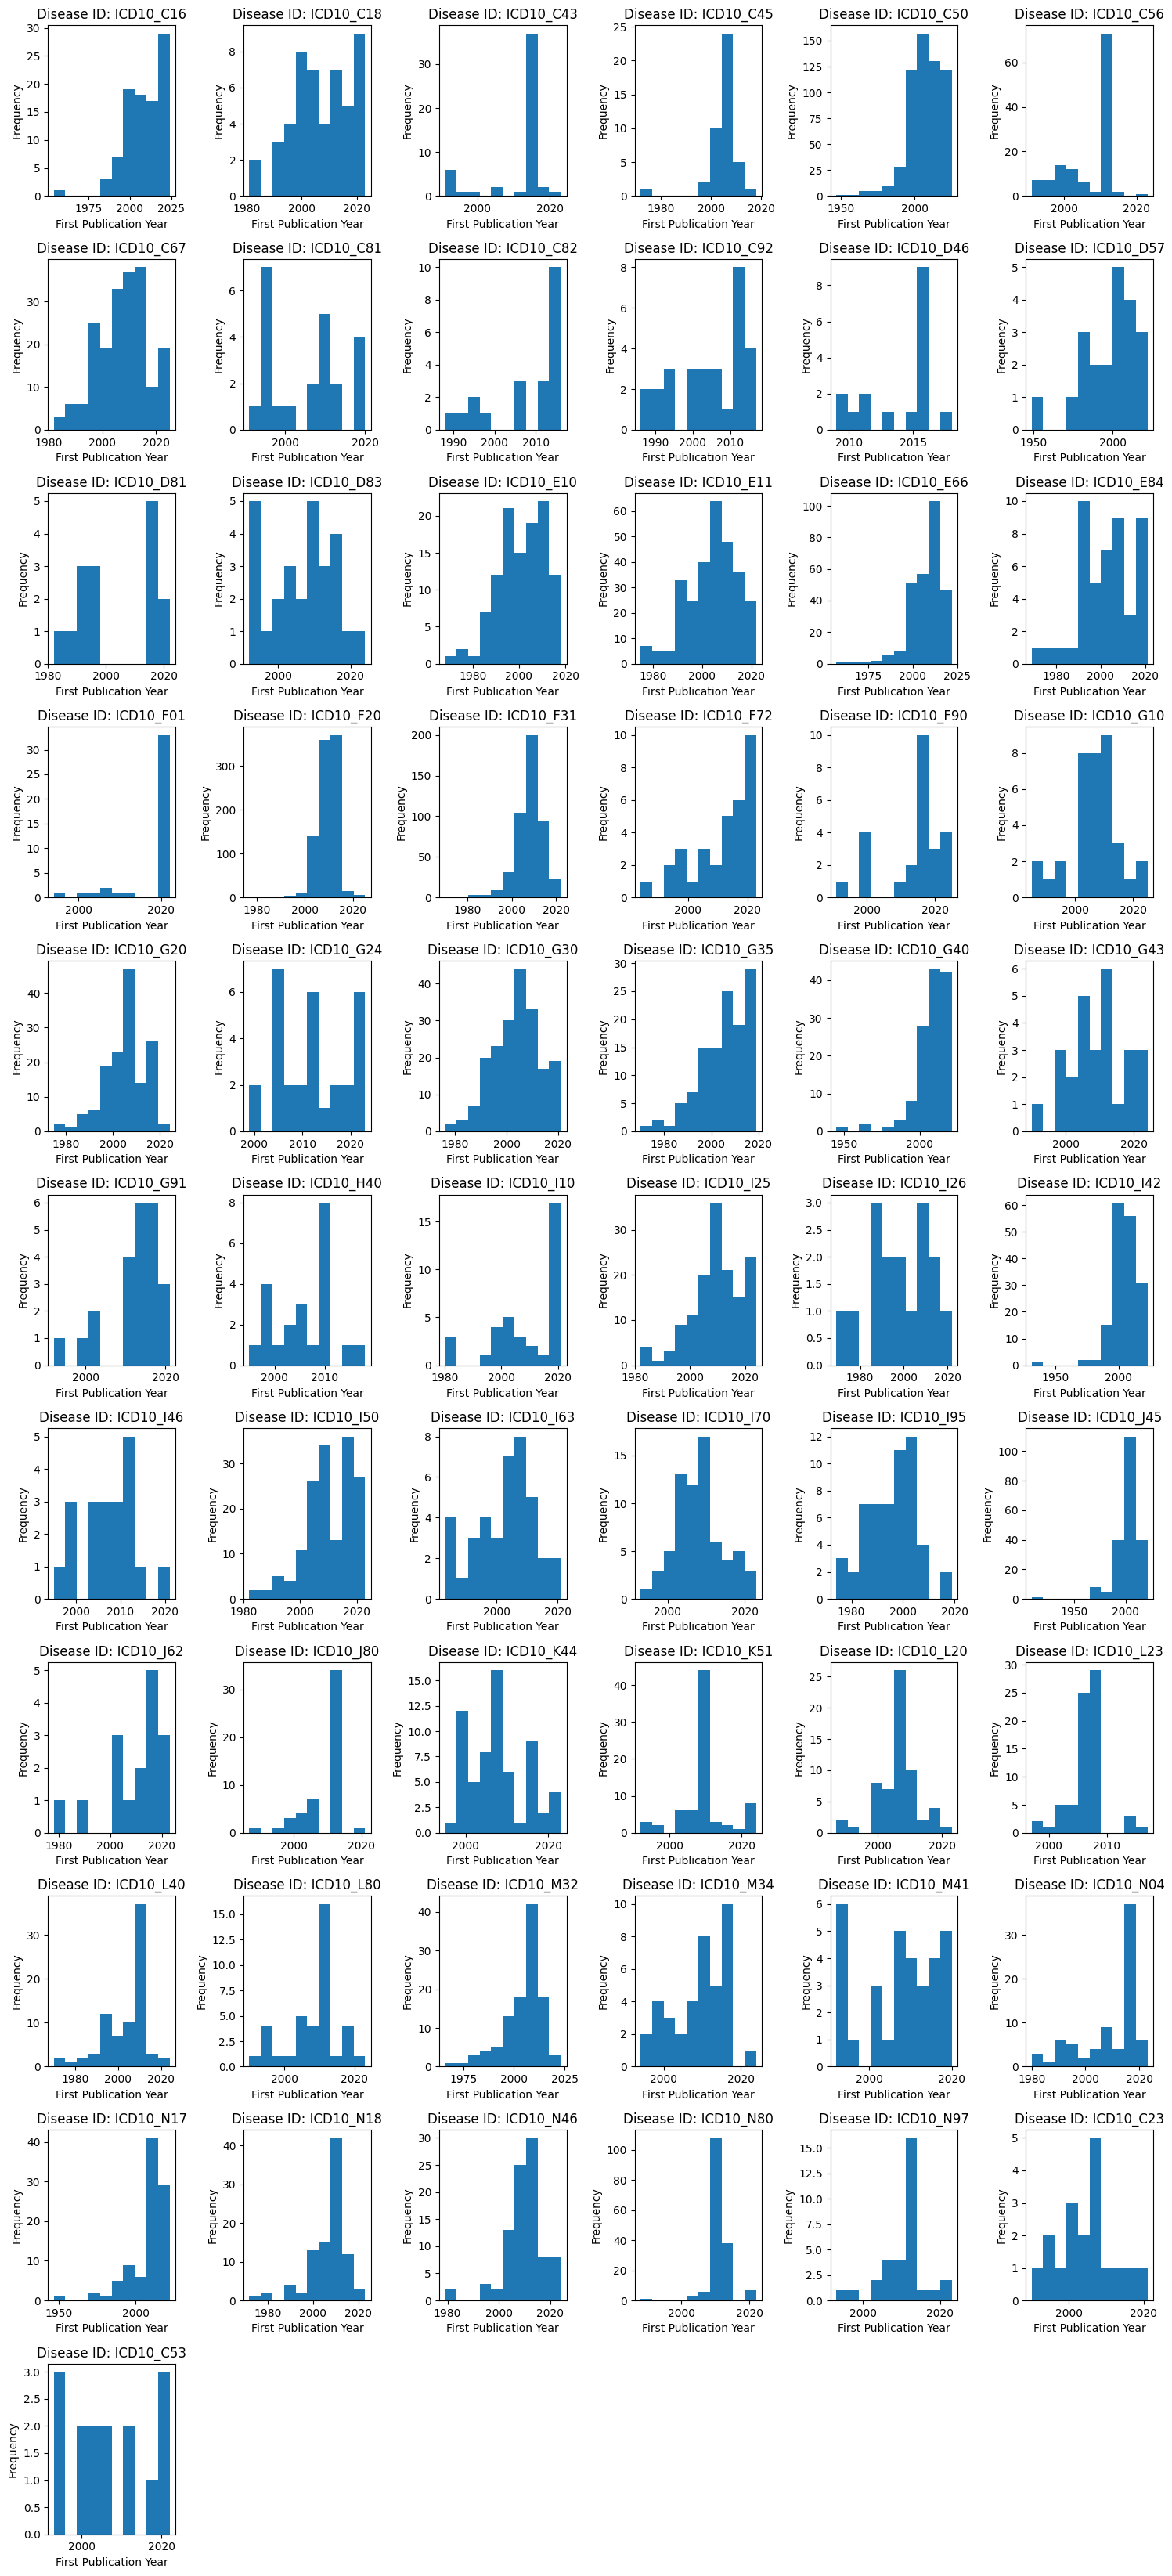

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dgas is a DataFrame already defined with the necessary data

# Get the unique disease_ids
unique_disease_ids = dgas['disease_id'].unique()

# Determine the number of subplots needed (rows and cols)
num_diseases = len(unique_disease_ids)
cols = 6  # You can set the number of columns as desired
rows = (num_diseases + cols - 1) // cols  # Calculate the needed rows

# Create a figure and an array of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to loop through

# Loop through each disease_id and plot the histogram
for i, disease_id in enumerate(unique_disease_ids):
    sub_df = dgas[dgas['disease_id'] == disease_id]
    if len(sub_df) < 15:
        continue
    else:
        axes[i].hist(sub_df['first_pub_year'], bins=10)  # You can adjust the number of bins
        axes[i].set_title(f'Disease ID: {disease_id}')
        axes[i].set_xlabel('First Publication Year')
        axes[i].set_ylabel('Frequency')

# If there are any empty subplots, hide them
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [2]:
# pseudo_select_function = [1,2]

root = '/itf-fi-ml/shared/users/ziyuzh/svm'
feature = 'ppi'


out_path = os.path.join(root,'results',feature)
if not os.path.exists(out_path):
    os.mkdir(out_path)

feature_df = get_feature(root,feature)

all_df = pd.read_csv(os.path.join(root,'data','disgent_2020','disgenet_string.csv'))

selected_diseases = (
    all_df.groupby('disease_id')
    .filter(lambda x: len(x) > 20)
    ['disease_id']
    .unique()
    .tolist()
)
# print(len(selected_diseases))
# summ = []
# for icd_code in selected_diseases:
#     icd_num = icd_code.split('_')[1]  # Extract ICD-10 code
#     # print(icd_num)
#     icd_letter = icd_num[0]
#     summ.append(icd_letter)
# # Initialize an empty dictionary
# counts = {}

# # Count occurrences
# for item in summ:
#     if item in counts:
#         counts[item] += 1
#     else:
#         counts[item] = 1

# # Print the count for each unique element
# print(len(counts))

In [10]:
temp = all_df.groupby('disease_id').filter(lambda x: len(x) > 15)['disease_id'].value_counts().values

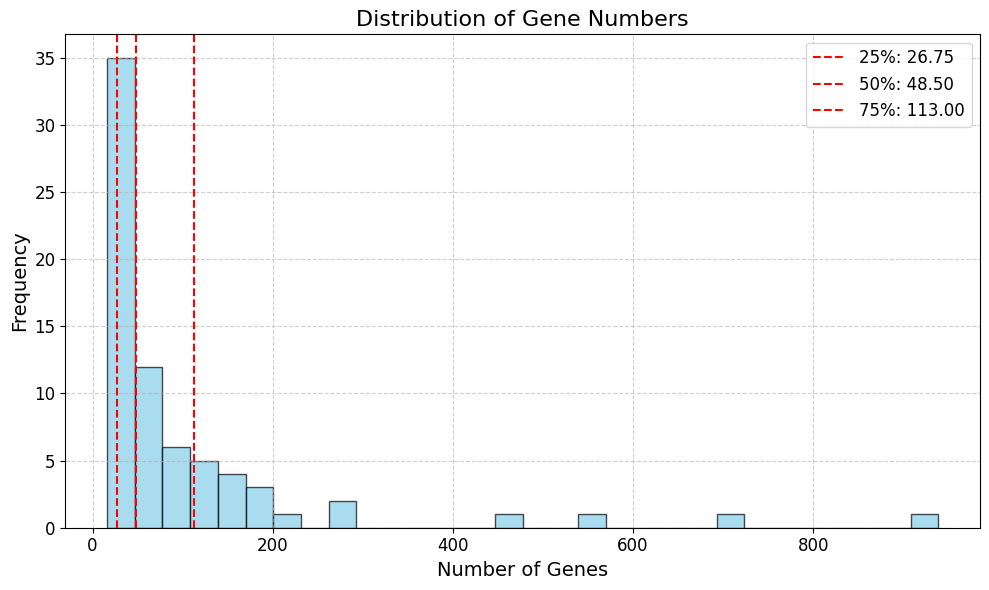

In [13]:
import matplotlib.pyplot as plt
# Calculate percentiles
gene_numbers = temp
percentiles = np.percentile(gene_numbers, [25, 50, 75])

# Sample histogram for 'gene_numbers'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(gene_numbers, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for percentiles
for perc, label in zip(percentiles, ['25%', '50%', '75%']):
    plt.axvline(x=perc, color='red', linestyle='--', label=f'{label}: {perc:.2f}')

# Add legend
plt.legend(fontsize=12)

# Add title and labels
plt.title('Distribution of Gene Numbers', fontsize=16)  # Add a title
plt.xlabel('Number of Genes', fontsize=14)             # Label for the x-axis
plt.ylabel('Frequency', fontsize=14)                   # Label for the y-axis

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [5]:
all_df[all_df['disease_id']=='ICD10_K25']['gene_id'].to_list()

['TNF',
 'PTGS2',
 'MMP9',
 'CAT',
 'IL1B',
 'EGF',
 'CCK',
 'LEP',
 'NOS2',
 'PTGS1',
 'FGF2',
 'GHRL',
 'NOS3',
 'IAPP',
 'EPO',
 'NRG1',
 'VGF',
 'ADM']

In [23]:
disease = 'ICD10_K25'
# disease = selected_diseases[0]

In [25]:
df, X, y = read_data(disease, all_df, feature_df)

In [26]:
all_df[all_df['disease_id']==disease]

,disease_id,omim,hpo,disease_name,gene_id,score,first_pub_year,last_pub_year,ei,dsi,dpi,uniprot_id,string_id
6801,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,TNF,0.75,2004.0,2004.0,0.800,0.226,0.957,P01375,9606.ENSP00000398698
6802,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,PTGS2,0.70,1997.0,2009.0,1.000,0.323,0.957,P35354,9606.ENSP00000356438
6803,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,MMP9,0.70,2007.0,2007.0,0.778,0.293,0.957,P14780,9606.ENSP00000361405
6804,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,CAT,0.70,1991.0,1991.0,0.857,0.350,1.000,Q6IB77,9606.ENSP00000241052
6805,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,IL1B,0.65,2001.0,2001.0,0.900,0.265,0.957,P01584,9606.ENSP00000263341
6806,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,EGF,0.65,1997.0,1997.0,1.000,0.313,0.913,P01133,9606.ENSP00000265171
6807,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,CCK,0.65,1998.0,2004.0,1.000,0.460,0.913,P06307,9606.ENSP00000379472
6808,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,LEP,0.65,1999.0,2008.0,1.000,0.312,0.957,P41159,9606.ENSP00000312652
6809,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,NOS2,0.65,2002.0,2009.0,0.857,0.333,1.000,P35228,9606.ENSP00000327251
6810,ICD10_K25,NaN,HPO_HP:0002592,Gastric ulcer,PTGS1,0.65,1999.0,2009.0,0.667,0.466,0.913,P23219,9606.ENSP00000354612


In [27]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold, GridSearchCV
from rdkit.ML.Scoring.Scoring import CalcBEDROC
# from pseudo_label import select_pseudo_negatives

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [7]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get the positive class samples
X_pos = X[y == 1]
y_pos = y[y == 1]

fold = 0
train_idx, test_idx = next(kf.split(X_pos))

X_train_pos, X_test_pos = X_pos[train_idx], X_pos[test_idx]
y_train_pos, y_test_pos = y_pos[train_idx], y_pos[test_idx]
neg_num = X_train_pos.shape[0]


In [8]:
train_pos = df[df['label']==1].iloc[train_idx]['string_id'].tolist()
test_pos = df[df['label']==1].iloc[test_idx]['string_id'].tolist()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

# Define the custom scoring function
def custom_score(y_true, y_proba):
    scores = np.column_stack((y_true, y_proba))  
    scores = scores[scores[:, 1].argsort()[::-1]] 
    return CalcBEDROC(scores, col=0, alpha=160.9)  

# Wrap the custom_score function using make_scorer
custom_scorer = make_scorer(custom_score, response_method='predict_proba')

def select_parameter_svm(X_train, y_train, metric):
    # Define parameter grid
    param_grid = {
        'C': [0.1, 0.5, 0.8, 1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
    }
    
    # Initialize SVM with probability estimates
    clf = svm.SVC(probability=True)
    
    if metric == 'bedroc_1':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=custom_scorer, verbose=1)
    elif metric == 'auroc':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', verbose=1)
    grid_search.fit(X_train, y_train)
    print('svm')
    return grid_search.best_params_

def select_parameter_rf(X_train, y_train, metric):
    # Define parameter grid for RandomForestClassifier
    param_grid = {
    'n_estimators' : [ 10, 20, 50, 100], 
    'max_features' : [ 20,50,100]
} 

    # Initialize RandomForestClassifier
    clf = RandomForestClassifier()

    # Perform GridSearchCV based on the metric
    if metric == 'bedroc_1':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=custom_scorer, verbose=1)
    elif metric == 'auroc':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', verbose=1)

    # Fit the grid search
    grid_search.fit(X_train, y_train)
    print('rf')
    
    return grid_search.best_params_

def select_parameter_mlp(X_train, y_train, metric):
    # Define parameter grid for RandomForestClassifier
    param_grid = {
            "alpha": [1, 0.5,0.1, 0.01],
              "hidden_layer_sizes": [(100,100),
                                     (100,100,100),
                                     (128,128),
                                     (128,128,128)],
              "activation": ["relu"]}

    # Initialize RandomForestClassifier
    clf = MLPClassifier(max_iter=500, early_stopping=True)

    # Perform GridSearchCV based on the metric
    if metric == 'bedroc_1':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=custom_scorer, verbose=1)
    elif metric == 'auroc':
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', verbose=1)

    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    print('mlp')
    
    return grid_search.best_params_

def calculate_ranks(values):
    return np.argsort(np.argsort(values)) + 1


In [12]:
from model import eval,eval_assemble
from rdkit.ML.Scoring.Scoring import CalcBEDROC

In [23]:
results = []
selected_neg_indices = np.random.choice(np.where(y == 0)[0], size=neg_num, replace=False)
X_train_neg = X[selected_neg_indices]
y_train_neg = y[selected_neg_indices]
X_train = np.vstack((X_train_pos, X_train_neg))
y_train = np.hstack((y_train_pos, y_train_neg))
# Get the remaining samples by masking the selected indices
remaining_neg_indices = np.setdiff1d(np.where(y == 0)[0], selected_neg_indices)
X_test_neg = X[remaining_neg_indices]
y_test_neg = y[remaining_neg_indices]
X_test = np.vstack((X_test_pos, X_test_neg))
y_test = np.hstack((y_test_pos, y_test_neg))
# for metric in ['bedroc_1','auroc']:
#     parameters, inner_result = select_parameter(X_train, y_train,metric)
#     best_svm = svm.SVC(**parameters)
#     results.append(eval(best_svm, X_train, y_train, X_test, y_test))

for metric in ['bedroc_1','auroc']:
    # parameters, inner_result = select_parameter_rf(X_train, y_train,metric)
    # best_svm = RandomForestClassifier(**parameters)
    parameters, inner_result = select_parameter_mlp(X_train, y_train,metric)
    best_svm = MLPClassifier(**parameters, max_iter=500, early_stopping=True)
        
    results.append(eval(best_svm, X_train, y_train, X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


bedroc_1 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (128, 128)} 0.9983017924420512
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


auroc {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100)} 0.8540747742070994


In [30]:
import numpy as np

# Given data
y_pro1 = [0, 0.5, 0.9, 0.1, 0.001, -0.5, 0.9]
y_pro2 = [0.1, 0.001, -0.5, 0.9, 0, 0.5, 0.9]

# y_scores is a list containing y_pro1 and y_pro2
y_scores = [y_pro1, y_pro2]

# Function to calculate ranks
def calculate_ranks(values):
    return np.argsort(np.argsort(values)) + 1

# Get ranks for each array in y_scores
ranks = [calculate_ranks(y) for y in y_scores]

# Calculate average ranks
average_ranks = np.mean(ranks, axis=0)

# Print results
print("Ranks for y_pro1:", ranks[0])
print("Ranks for y_pro2:", ranks[1])
print("Average ranks:", average_ranks)


Ranks for y_pro1: [2 5 6 4 3 1 7]
Ranks for y_pro2: [4 3 1 6 2 5 7]
Average ranks: [3.  4.  3.5 5.  2.5 3.  7. ]


In [31]:
result_df = pd.DataFrame(columns=['model',"fold","para", 'top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get the positive class samples
X_pos = X[y == 1]
y_pos = y[y == 1]

for fold, (train_idx, test_idx) in enumerate(kf.split(X_pos)):

    X_train_pos, X_test_pos = X_pos[train_idx], X_pos[test_idx]
    y_train_pos, y_test_pos = y_pos[train_idx], y_pos[test_idx]
    neg_num = X_train_pos.shape[0]

    selected_neg_indices = np.random.choice(np.where(y == 0)[0], size=neg_num, replace=False)
    X_train_neg = X[selected_neg_indices]
    y_train_neg = y[selected_neg_indices]
    X_train = np.vstack((X_train_pos, X_train_neg))
    y_train = np.hstack((y_train_pos, y_train_neg))
    # Get the remaining samples by masking the selected indices
    remaining_neg_indices = np.setdiff1d(np.where(y == 0)[0], selected_neg_indices)
    X_test_neg = X[remaining_neg_indices]
    y_test_neg = y[remaining_neg_indices]
    X_test = np.vstack((X_test_pos, X_test_neg))
    y_test = np.hstack((y_test_pos, y_test_neg))


    # for metric in ['bedroc_1','auroc']:
        # parameters, inner_result = select_parameter(X_train, y_train,metric)
        # best_svm = svm.SVC(**parameters)
        # parameters, inner_result = select_parameter_rf(X_train, y_train,metric)
        # best_svm = RandomForestClassifier(**parameters)
        # parameters, inner_result = select_parameter_mlp(X_train, y_train,metric)
        # best_svm = MLPClassifier(**parameters, max_iter=500, early_stopping=True)
    y_assemble = []
    metric = 'auroc'
    basline_models = ['svm','rf','mlp']
    if 'svm' in basline_models:
        parameters = select_parameter_svm(X_train, y_train,metric)
        best_svm = svm.SVC(**parameters)
        if len(basline_models)>1:
            best_svm.fit(X_train, y_train)
            y_assemble.append(best_svm.decision_function(X_test))
        else:
            result_df.loc[len(result_df.index)] = ['svm',fold,str(parameters), *eval(best_svm, X_train, y_train, X_test, y_test)]
    if 'rf' in basline_models:
        parameters = select_parameter_rf(X_train, y_train,metric)
        best_rf = RandomForestClassifier(**parameters)
        if len(basline_models)>1:
            best_rf.fit(X_train, y_train)
            y_assemble.append(best_rf.predict_proba(X_test)[:, 1])
        else:
            result_df.loc[len(result_df.index)] = ['rf',fold,str(parameters), *eval(best_svm, X_train, y_train, X_test, y_test)]

    if 'mlp' in basline_models:
        parameters = select_parameter_mlp(X_train, y_train,metric)
        best_mlp = MLPClassifier(**parameters, max_iter=500, early_stopping=True)
        if len(basline_models)>1:
            best_mlp.fit(X_train, y_train)
            y_assemble.append(best_rf.predict_proba(X_test)[:, 1])
        else:
            result_df.loc[len(result_df.index)] = ['mlp',fold,str(parameters), *eval(best_svm, X_train, y_train, X_test, y_test)]
    if len(basline_models)>1:
        y_ranks = np.mean([calculate_ranks(y) for y in y_assemble], axis=0)
        result_df.loc[len(result_df.index)] = [str(basline_models),fold,str(parameters), *eval_assemble(y_test,y_ranks)]



Fitting 5 folds for each of 30 candidates, totalling 150 fits
svm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
rf
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


mlp
Fitting 5 folds for each of 30 candidates, totalling 150 fits
svm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
rf
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


mlp
Fitting 5 folds for each of 30 candidates, totalling 150 fits
svm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
rf
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


mlp
Fitting 5 folds for each of 30 candidates, totalling 150 fits
svm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
rf
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


mlp
Fitting 5 folds for each of 30 candidates, totalling 150 fits
svm
Fitting 5 folds for each of 12 candidates, totalling 60 fits
rf
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/itf-fi-ml/shared/users/ziyuzh/.venv/lib64/python3.11/site-packages/sklearn/model_selection/_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


mlp


In [28]:
result_df.groupby('model')[['top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

,model,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30
0,"['svm', 'rf']",0.686591,0.020355,0.029645,0.880075,0.008696,0.009879,0.883027,0.11814,0.218329,0.381745,0.489352,0.679974


In [33]:
result_df.groupby('model')[['top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

,model,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30
0,"['svm', 'rf', 'mlp']",0.644424,0.019102,0.029645,0.852068,0.008418,0.009879,0.860051,0.14104,0.213341,0.365253,0.470108,0.656842


In [26]:
########### MLP-high alpha
result_df.groupby(['metric'])[['top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

,metric,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30
0,auroc,0.598496,0.017745,0.029645,0.799311,0.007896,0.009879,0.830913,0.17008,0.159142,0.322309,0.426598,0.611509
1,bedroc_1,0.637531,0.018894,0.029645,0.841604,0.008313,0.009879,0.854046,0.14704,0.168549,0.332084,0.441730,0.635852


In [ ]:
########### RF
result_df.groupby(['metric'])[['top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

,metric,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30
0,auroc,0.633897,0.018789,0.029645,0.844925,0.008348,0.009879,0.85839,0.14254,0.206779,0.372024,0.476545,0.659530
1,bedroc_1,0.566729,0.016806,0.029645,0.756767,0.007478,0.009879,0.82733,0.18158,0.153421,0.307352,0.407585,0.597482


In [ ]:
########### SVM
result_df.groupby(['metric'])[["recall", "precision", 'top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

,metric,recall,precision,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30
0,auroc,0.742982,0.013852,0.665539,0.019729,0.029645,0.855451,0.008452,0.009879,0.878277,0.12286,0.224600,0.396262,0.500345,0.680907
1,bedroc_1,0.704574,0.014902,0.651441,0.019311,0.029645,0.837970,0.008279,0.009879,0.873167,0.12796,0.207883,0.371267,0.476352,0.662930


In [36]:
train_neg = df.iloc[selected_neg_indices]['string_id'].tolist()
test_neg = df.iloc[remaining_neg_indices]['string_id'].tolist()

In [85]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage

def calculate_proportion(hierarchical_labels, y_train, func):
    proportion = []
    unique_clusters = np.unique(hierarchical_labels)
    
    # Total number of samples with label 1
    total_y1 = np.sum(y_train == 1)
    if total_y1 == 0:
        raise ValueError("No positive samples in training data")

    for c in unique_clusters:
        cluster_indices = np.where(hierarchical_labels == c)[0]
        cluster_y1 = np.sum(y_train[cluster_indices] == 1)
        
        if func == 1:
            A_i = len(cluster_indices) * (1 - (cluster_y1 / total_y1))
        elif func == 2:
            A_i = max(0, 2 * len(cluster_indices) / len(y_train) - (cluster_y1 / total_y1))
        elif func == 3:
            A_i = max(0, 2 * len(cluster_indices) / len(y_train) - (cluster_y1 / total_y1))
            if cluster_y1 == 0:
                # A_i = np.exp(0.05 * A_i)
                A_i = A_i**0.5
        
        proportion.append(A_i)
        ###################
        print(c, len(cluster_indices), cluster_y1, total_y1)
        ###################
    return proportion

def cluster_negative_sampling(hierarchical_labels, y_train, proportion, neg_size):
    neg_cluster = []
    all_sampled_negatives = []
    unique_clusters = np.unique(hierarchical_labels)
    total_proportion = sum(proportion)

    if total_proportion == 0:
        raise ValueError("Sum of proportions is zero. Check the 'proportion' calculation.")

    for index, c in enumerate(unique_clusters):
        A_i = proportion[index]
        neg_i = int((A_i / total_proportion) * neg_size)

        cluster_indices = np.where(hierarchical_labels == c)[0]
        negative_indices = cluster_indices[y_train[cluster_indices] == 0]

        if len(negative_indices) == 0:
            continue  
        neg_i = min(neg_i, len(negative_indices))  # Adjust to max available

        ################################
        print(c, neg_i)
        ################################

        sampled_indices = np.random.choice(negative_indices, size=neg_i, replace=False)
        all_sampled_negatives.extend(sampled_indices)
        neg_cluster.append(neg_i)

    return all_sampled_negatives

def select_pseudo_negatives(neg_num, X_train_pos, y_train_pos, X_all_neg, y_all_neg, func):
    # Combine positive and negative samples
    X_train = np.vstack((X_train_pos, X_all_neg))
    y_train = np.hstack((y_train_pos, y_all_neg))

    # Hierarchical clustering
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)
    model.fit(X_train)

    # Get linkage matrix
    mat = linkage(X_train, method='ward')

    # Get first-level labels
    n_clusters = 5
    hierarchical_labels = fcluster(mat, n_clusters, criterion='maxclust')
    #####################################
    print('label ready')
    #####################################

    # Sample negatives
    proportion = calculate_proportion(hierarchical_labels, y_train, func)
    all_sampled_negatives = cluster_negative_sampling(hierarchical_labels, y_train, proportion, neg_num)

    return hierarchical_labels, all_sampled_negatives, X_train[all_sampled_negatives], y_train[all_sampled_negatives]

In [166]:
hierarchical_labels, all_sampled_negatives, X_train_neg2, y_train_neg2 = select_pseudo_negatives(neg_num, X_train_pos, y_train_pos, X[y==0], y[y==0],3)
# dtype = X.dtype.descr  # Get data type of elements
# X_y0_view = X[y == 0].view(dtype=[('', X.dtype)] * X.shape[1])
# X_train_neg_view = X_train_neg2.view(dtype=[('', X.dtype)] * X.shape[1])
# X_test_neg2 = np.setdiff1d(X_y0_view, X_train_neg_view).view(X.dtype).reshape(-1, X.shape[1])  

select_index = all_sampled_negatives - np.sum(np.hstack((y_train_pos, y[y==0])) == 1) +1
X_all_neg_add0 = np.vstack((np.zeros((1, X.shape[1])), X[y==0]))
select_index_add0 = np.hstack((np.zeros((1,)), select_index))
test_neg_index = np.setdiff1d(np.arange(X_all_neg_add0.shape[0]),select_index_add0)
X_test_neg2 = X_all_neg_add0[test_neg_index]

X_train2 = np.vstack((X_train_pos, X_train_neg2))
y_train2 = np.hstack((y_train_pos, y_train_neg2))

X_test2 = np.vstack((X_test_pos, X_test_neg2))
y_test2 = np.array([1]*X_test_pos.shape[0]+[0]*X_test_neg2.shape[0])


label ready
1 808 0 14
2 2153 6 14
3 6012 2 14
4 382 0 14
5 9488 6 14
1 2
2 0
3 4
4 1
5 5


In [ ]:
from model import select_parameter, eval
parameters = select_parameter(X_train, y_train)
best_svm = svm.SVC(**parameters)
eval(best_svm, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


(1.0,
 0.0010655301012253596,
 1.0,
 0.002126528442317916,
 0.002126528442317916,
 1.0,
 0.00070859167404783,
 0.00070859167404783,
 0.9557533882540526,
 0.0444,
 0.37922130994475545,
 0.5050062156974067,
 0.6115934075984235,
 0.8106669636266506)

In [169]:
X_test.shape, X_test2.shape

((18819, 1024), (18821, 1024))

In [ ]:
parameters = select_parameter(X_train2, y_train2)
best_svm = svm.SVC(**parameters)
eval(best_svm, X_train2, y_train2, X_test2, y_test2)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


(1.0,
 0.0002125285585250518,
 0.25,
 0.0005313496280552603,
 0.0021253985122210413,
 0.5,
 0.00035423308537017357,
 0.0007084661707403471,
 0.7225647021310516,
 0.2775,
 0.0010832886657002932,
 0.08734681288406333,
 0.1736007952801108,
 0.36923901651443924)

In [87]:
total_y1 = 14

In [88]:
fracs1 = calculate_proportion(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), 1)
cluster_negative_sampling(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), fracs1, total_y1)

1 808 0 14
2 2153 6 14
3 6012 2 14
4 382 0 14
5 9488 6 14
1 0
2 1
3 5
4 0
5 5


[18498, 224, 12645, 17749, 3059, 13154, 6139, 108, 12974, 4511, 10541]

In [89]:
fracs2 = calculate_proportion(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), 2)
cluster_negative_sampling(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), fracs2, total_y1)

1 808 0 14
2 2153 6 14
3 6012 2 14
4 382 0 14
5 9488 6 14
1 1
2 0
3 5
4 0
5 6


[162, 9694, 13885, 13716, 17386, 7857, 559, 7796, 2185, 208, 3611, 9906]

In [90]:
fracs3 = calculate_proportion(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), 3)
cluster_negative_sampling(hierarchical_labels, np.hstack((y_train_pos, y[y==0])), fracs3, total_y1)

1 808 0 14
2 2153 6 14
3 6012 2 14
4 382 0 14
5 9488 6 14
1 2
2 0
3 4
4 1
5 5


[615, 10421, 11942, 18110, 16625, 6087, 6521, 16290, 9091, 7701, 10926, 13555]

In [96]:
np.where(y[y==0]==0), np.where(np.hstack((y_train_pos, y[y==0]))==0)

((array([    0,     1,     2, ..., 18826, 18827, 18828]),),
 (array([   14,    15,    16, ..., 18840, 18841, 18842]),))

In [102]:
X[y==0][615],np.vstack((X_train_pos, X[y==0]))[615+np.sum(np.hstack((y_train_pos, y[y==0])) == 1)]

(array([ 0.02728 ,  0.0634  ,  0.03085 , ...,  0.01265 , -0.0102  ,
         0.005836]),
 array([ 0.02728 ,  0.0634  ,  0.03085 , ...,  0.01265 , -0.0102  ,
         0.005836]))

In [ ]:

select_index

array([10018,  7149, 14247, 14200,  6616,  9397,  9957, 16276,  3334,
       15167, 13425])

In [147]:
all_sampled_negatives

[10031, 7162, 14260, 14213, 6629, 9410, 9970, 16289, 3347, 15180, 13438]

In [148]:
np.vstack((X_train_pos, X[y==0]))[all_sampled_negatives]

array([[ 0.01498  , -0.00929  ,  0.0608   , ..., -0.06152  ,  0.02278  ,
         0.04175  ],
       [ 0.01881  , -0.0004587,  0.04816  , ...,  0.0819   ,  0.1083   ,
        -0.02129  ],
       [ 0.07     ,  0.0387   ,  0.0387   , ...,  0.000979 , -0.0552   ,
         0.0126   ],
       ...,
       [-0.00756  , -0.04572  ,  0.0443   , ...,  0.002937 ,  0.0604   ,
         0.05484  ],
       [ 0.04584  ,  0.06805  ,  0.033    , ...,  0.0314   , -0.01584  ,
         0.01378  ],
       [ 0.03098  ,  0.1173   ,  0.03056  , ...,  0.001677 ,  0.02406  ,
         0.05276  ]])

In [149]:
np.vstack((np.zeros((1, X.shape[1])), X[y==0]))[select_index]

array([[ 0.01498  , -0.00929  ,  0.0608   , ..., -0.06152  ,  0.02278  ,
         0.04175  ],
       [ 0.01881  , -0.0004587,  0.04816  , ...,  0.0819   ,  0.1083   ,
        -0.02129  ],
       [ 0.07     ,  0.0387   ,  0.0387   , ...,  0.000979 , -0.0552   ,
         0.0126   ],
       ...,
       [-0.00756  , -0.04572  ,  0.0443   , ...,  0.002937 ,  0.0604   ,
         0.05484  ],
       [ 0.04584  ,  0.06805  ,  0.033    , ...,  0.0314   , -0.01584  ,
         0.01378  ],
       [ 0.03098  ,  0.1173   ,  0.03056  , ...,  0.001677 ,  0.02406  ,
         0.05276  ]])

In [153]:
test_1_neg.shape, X[y==0].shape, len(all_sampled_negatives)

((18818, 1024), (18829, 1024), 11)

In [154]:
X_train_neg2 = np.vstack((X_train_pos, X[y==0]))[all_sampled_negatives]
dtype = X.dtype.descr  # Get data type of elements
X_y0_view = X[y == 0].view(dtype=[('', X.dtype)] * X.shape[1])
X_train_neg_view = X_train_neg2.view(dtype=[('', X.dtype)] * X.shape[1])
X_test_neg2 = np.setdiff1d(X_y0_view, X_train_neg_view).view(X.dtype).reshape(-1, X.shape[1]) 

In [ ]:
np.array_equal(X_test_neg2,test_1_neg)

False

In [158]:
X_test_neg2

array([[-0.1626 ,  0.0713 ,  0.07477, ...,  0.01704,  0.1587 , -0.0572 ],
       [-0.1482 ,  0.1383 ,  0.1103 , ...,  0.09534,  0.0857 ,  0.0679 ],
       [-0.139  ,  0.1844 ,  0.1327 , ...,  0.04663,  0.0678 ,  0.07007],
       ...,
       [ 0.1997 ,  0.0871 ,  0.0445 , ..., -0.1324 ,  0.1738 ,  0.06573],
       [ 0.2004 ,  0.1542 , -0.01544, ..., -0.05084,  0.04562, -0.01779],
       [ 0.2065 ,  0.1438 , -0.0892 , ..., -0.1326 ,  0.03998,  0.1515 ]])

In [159]:
test_1_neg

array([[ 0.0368  , -0.01436 ,  0.04453 , ...,  0.0305  ,  0.05273 ,
         0.02362 ],
       [ 0.06207 , -0.03644 ,  0.01286 , ..., -0.0389  ,  0.03513 ,
         0.0466  ],
       [-0.000283,  0.0954  ,  0.02435 , ..., -0.02948 ,  0.007755,
         0.04434 ],
       ...,
       [ 0.0417  ,  0.03415 ,  0.0168  , ..., -0.00958 , -0.001243,
         0.013115],
       [ 0.0922  , -0.004875,  0.06155 , ...,  0.02069 ,  0.11115 ,
         0.1022  ],
       [ 0.014244,  0.0847  ,  0.02559 , ..., -0.0188  , -0.01155 ,
         0.03864 ]])

In [162]:
df_neg_2 = pd.DataFrame(X_test_neg2)
df_neg_1 = pd.DataFrame(test_1_neg)

In [164]:
df_neg_2.shape,df_neg_1.shape

((18818, 1024), (18818, 1024))

In [165]:
pd.merge(df_neg_2, df_neg_1, how='inner')

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.1626,0.07130,0.074770,0.04400,0.06305,-0.11920,-0.01753,-0.21560,-0.001537,-0.104550,...,0.00231,-0.029900,-0.103000,-0.11990,0.108500,0.14040,-0.002398,0.017040,0.15870,-0.05720
1,-0.1482,0.13830,0.110300,-0.05585,-0.03845,-0.08780,-0.12463,-0.14880,-0.058930,-0.223500,...,0.07120,-0.102540,-0.014404,-0.10820,0.037300,-0.10455,0.060460,0.095340,0.08570,0.06790
2,-0.1390,0.18440,0.132700,-0.02540,-0.02960,-0.11560,-0.03604,-0.07170,-0.021410,-0.135300,...,-0.00941,-0.078250,-0.097800,-0.04715,0.181000,-0.08530,-0.077400,0.046630,0.06780,0.07007
3,-0.1368,-0.00502,0.029050,-0.01820,-0.01316,0.02803,-0.02254,-0.07684,0.006454,0.011420,...,-0.01804,-0.011930,-0.010110,-0.03723,0.015100,0.02060,0.012180,-0.017030,0.05927,0.08514
4,-0.1359,-0.02455,0.037930,0.02295,0.02830,-0.01974,-0.04654,-0.04580,0.007156,-0.007412,...,0.02070,0.000252,0.000373,-0.09330,0.087500,0.04376,0.044860,-0.008940,0.11755,0.10260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18813,0.1890,0.11530,0.014465,0.11250,0.11580,-0.07040,0.21980,-0.33940,-0.098140,0.281000,...,-0.06793,0.100300,-0.045440,-0.23030,0.140400,-0.20580,-0.207900,0.010574,0.04565,0.11620
18814,0.1891,0.01279,0.073800,0.04733,0.01533,-0.06790,0.18650,-0.20340,-0.101200,0.263400,...,-0.09530,0.027760,-0.058100,-0.13180,0.120900,-0.13160,-0.139200,0.027440,0.10940,0.06690
18815,0.1997,0.08710,0.044500,0.02210,0.22030,0.10870,-0.18150,0.01538,0.010420,0.077400,...,0.08264,0.005140,-0.014854,-0.12560,0.012570,-0.12290,0.034450,-0.132400,0.17380,0.06573
18816,0.2004,0.15420,-0.015440,0.10240,0.11646,0.07100,0.17850,-0.23690,-0.032650,0.173300,...,-0.14100,0.040000,-0.098000,-0.16040,0.039580,-0.09310,-0.148800,-0.050840,0.04562,-0.01779
